In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import sklearn

# Machine Learning in Python with scikit-learn

scikit-learn (`sklearn`) provides a user-friendly, but powerful way to conduct machine learning
analyses in Python. It simplifies most standard machine learning tasks - training many kinds of
classifiers, predicting new results, obtaining cross-validated scores, feature extraction -
with one consistent API; you only have to learn one way of calling the tools.

Here, we provide an ultra brief intro to scikit-learn on a digit classification task.

In [2]:
# load the `digits` dataset
from sklearn.datasets import load_digits
data = load_digits()

In [3]:
print(data["DESCR"])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In Machine Learning, the outcomes are typically called `y` and the predictors `X`.

In [5]:
X, y = data["data"], data["target"]

Let's look at the predictors (with matplotlib):

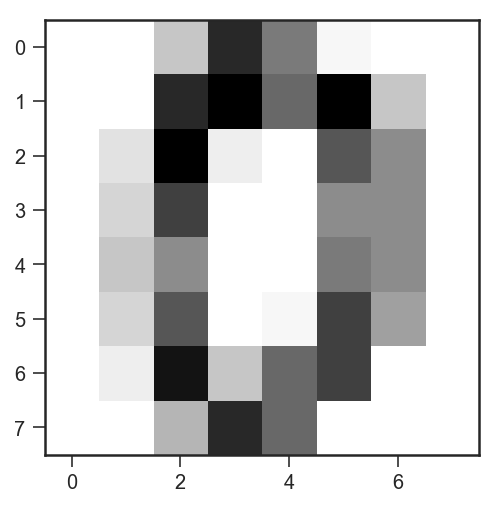

In [6]:
plt.imshow(data["images"][0], cmap="Greys")

The same values as in `data["images"]` are also stored in ´data["data"]`, and thus now `X`,
albeit in a dfifferent shape (as an 1x64 vector):

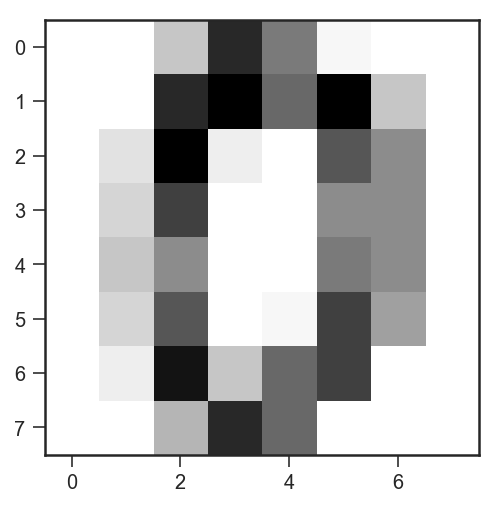

In [7]:
plt.imshow(X[0].reshape((8, 8)), cmap="Greys")

What are the corresponding outcomes?

In [8]:
y[0]

0

Some more ...

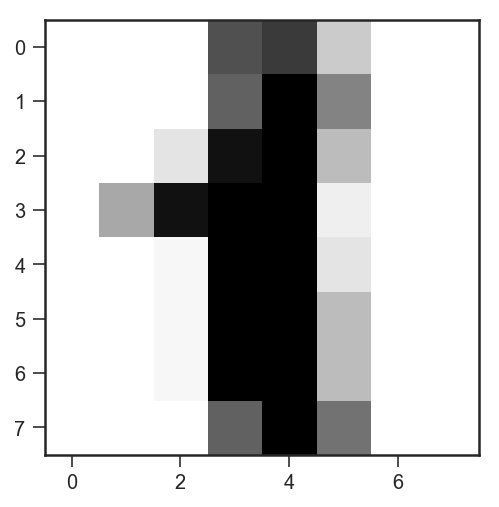

In [9]:
plt.imshow(X[1].reshape((8, 8)), cmap="Greys")

In [10]:
y[1]

1

Plotting a few ...

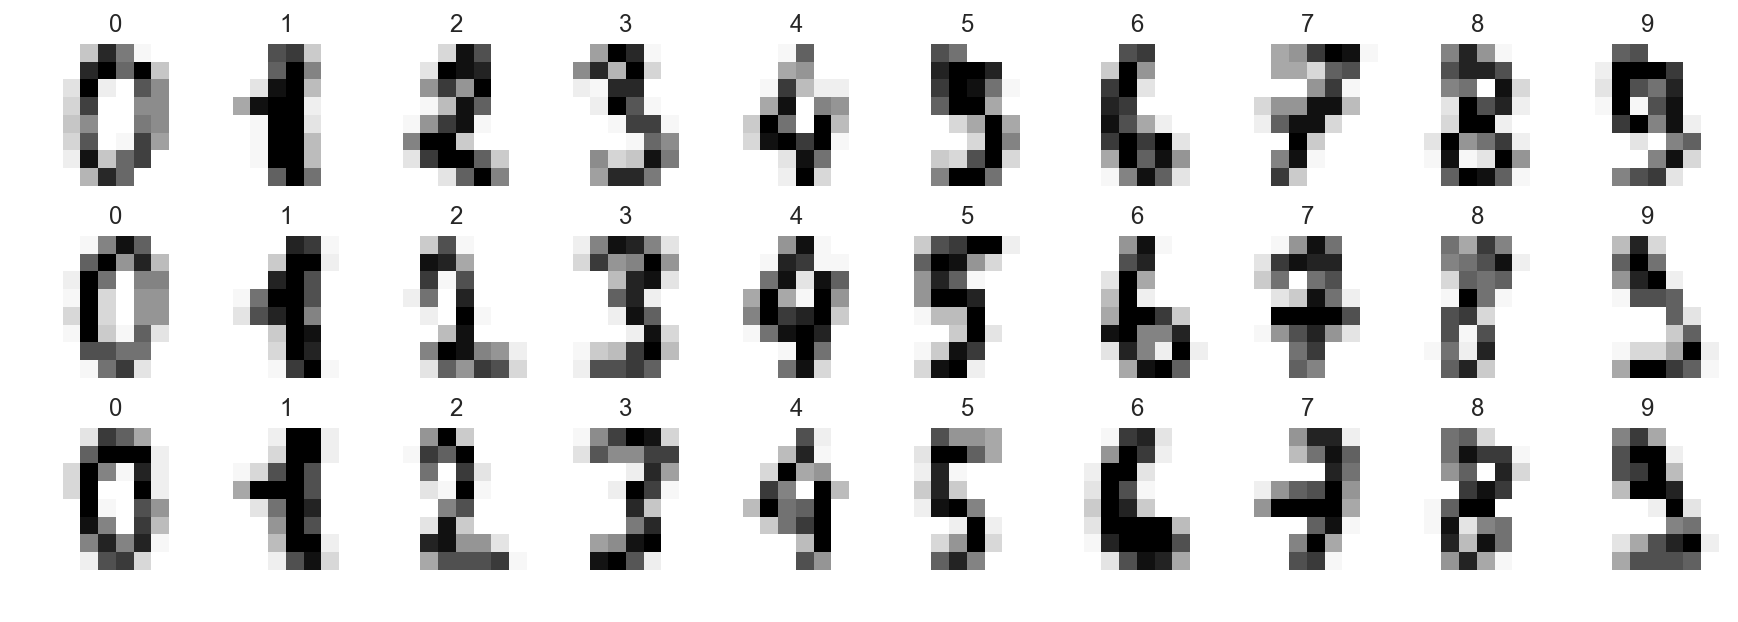

In [11]:
fig, axes = plt.subplots(ncols=10, nrows=3, figsize=(15, 5))

for ii, (ax, im, y_) in enumerate(zip(axes.flatten(), X, y)):
    ax.imshow(im.reshape((8, 8)), cmap="Greys")
    ax.set_title(y_)
    ax.axis("off")

We will train a simple linear classifier to predict $y$ from $X$, i.e., read the digit based off of the pixels.

In [12]:
from sklearn.linear_model import LogisticRegression

We create an instance of a Logistic Regression Classifier ...

In [14]:
est = LogisticRegression(dual=False)

... and fit it to the training set (i.e., we learn the patterns required to predict digits).

In [15]:
est.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

What has the classifier learned? We can visualise the learned patterns:

In [16]:
est.coef_.shape

(10, 64)

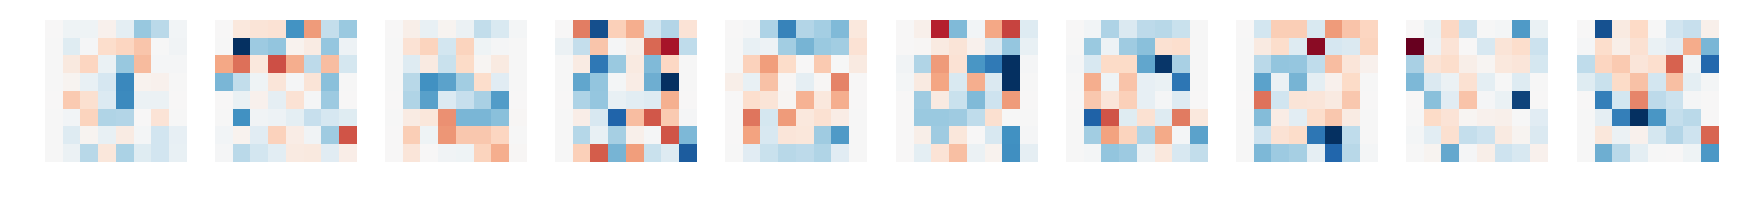

In [17]:
fig, axes = plt.subplots(ncols=10, nrows=1, figsize=(15, 3))
for ax, pattern in zip(axes.flatten(), est.coef_):
    ax.imshow((pattern).reshape((8, 8)), cmap="RdBu_r", vmin=-1, vmax=1)
    ax.axis("off")

The classifier has a `fit` and a `predict` method. We can print its predictions:

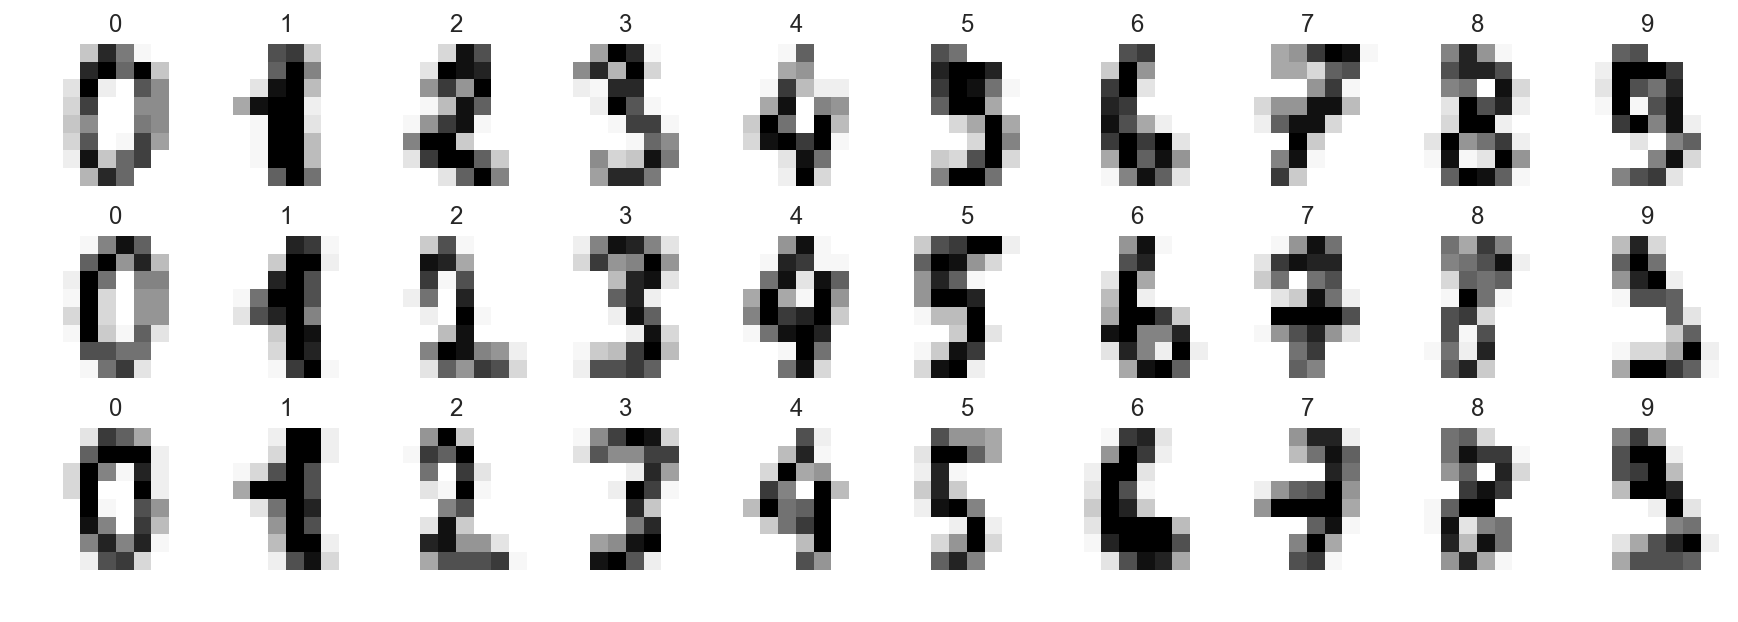

In [18]:
fig, axes = plt.subplots(ncols=10, nrows=3, figsize=(15, 5))

for ii, (ax, im) in enumerate(zip(axes.flatten(), X)):
    ax.imshow(im.reshape((8, 8)), cmap="Greys")
    predicted = est.predict(im[np.newaxis, :])[0]
    ax.set_title(predicted)
    ax.axis("off")

But this is testing on the training set. We need to separate testing and training!
For that, we can use the `cross_val_predict` helper:

In [19]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [20]:
predictions = cross_val_predict(est, X, y)

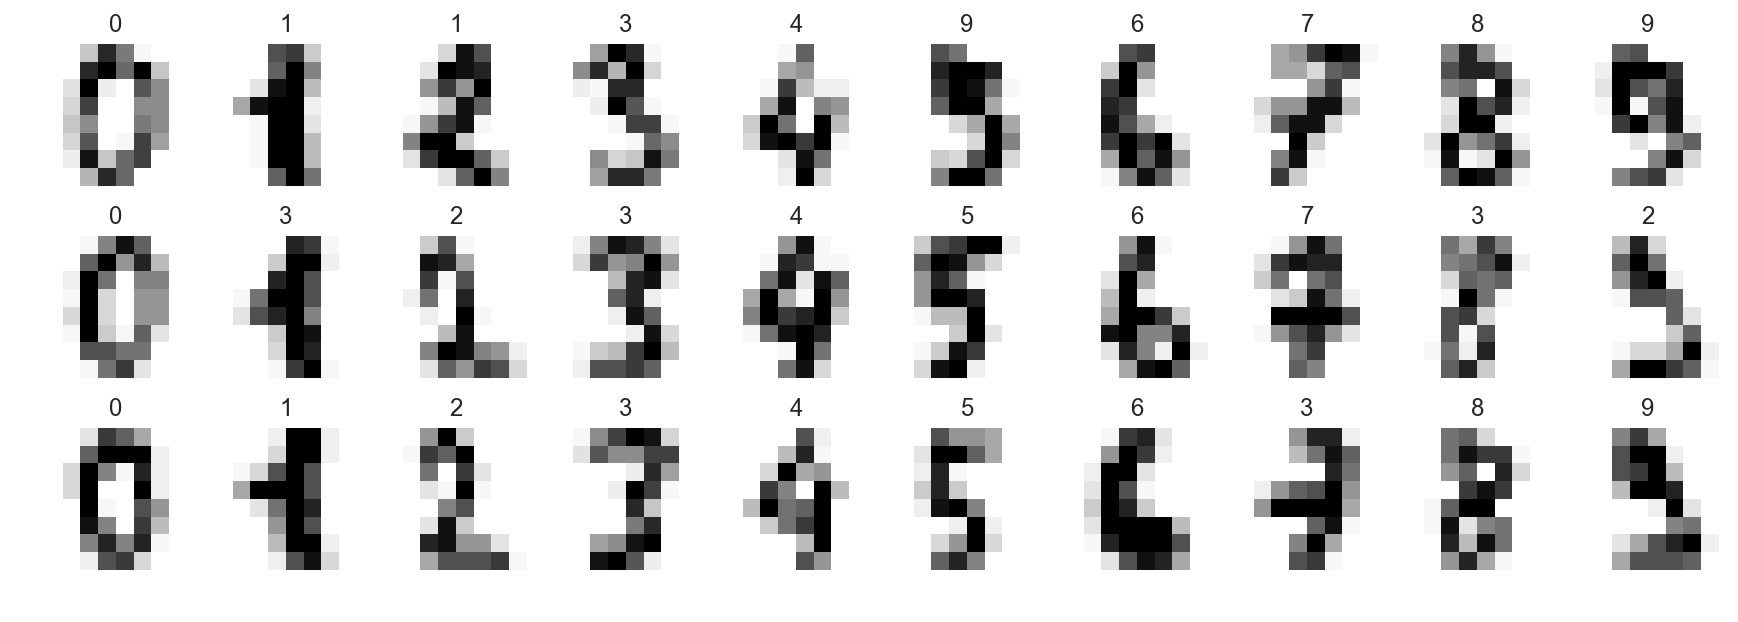

In [21]:
fig, axes = plt.subplots(ncols=10, nrows=3, figsize=(15, 5))

for ii, (ax, im, y_pred) in enumerate(zip(axes.flatten(), X, predictions)):
    ax.imshow(im.reshape((8, 8)), cmap="Greys")
    ax.set_title(y_pred)
    ax.axis("off")

And we can use the `cross_val_score` function to check the predictive accuracy:

In [22]:
cross_val_score(est, X, y)

array([0.89534884, 0.94991653, 0.90939597])

What if we want to try a more powerful classifier?

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=1000)

... same API

In [25]:
cross_val_score(rf, X, y)

array([0.94019934, 0.95993322, 0.92281879])

We can perform complex feature preprocessing techniques with sklearn, with a similar API.

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

(array([60367.,  6240.,  3261.,  5362.,  2627.,  6049.,  5556.,  3668.,
         7118., 14760.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

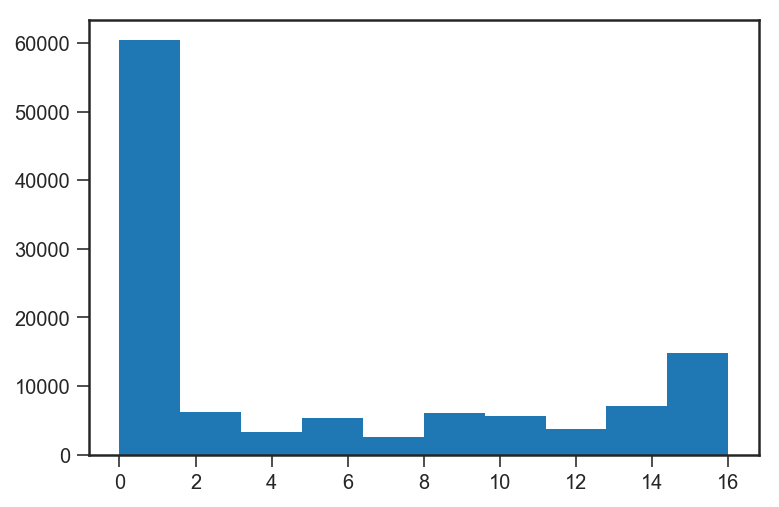

In [27]:
plt.hist(X.flatten())

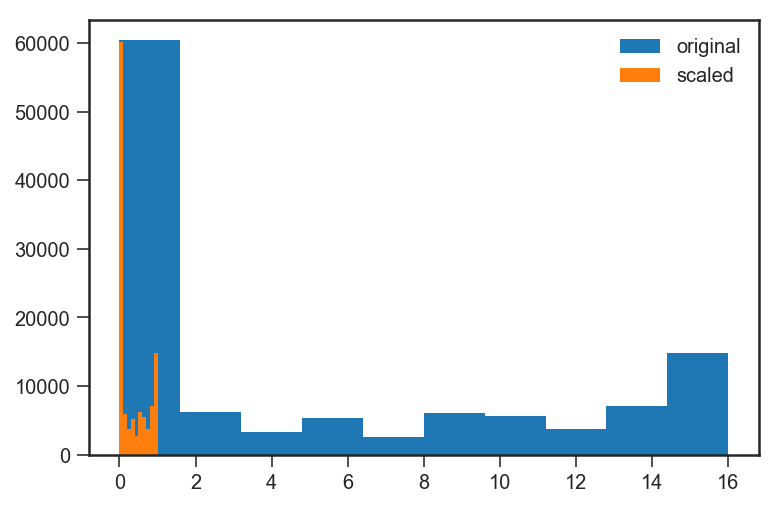

In [28]:
x_scaled = MinMaxScaler((0, 1)).fit_transform(X)
plt.hist(X.flatten(), label="original")
plt.hist(x_scaled.flatten(), label="scaled")
plt.legend()

Now for something more interesting ... remember what the digits look like!

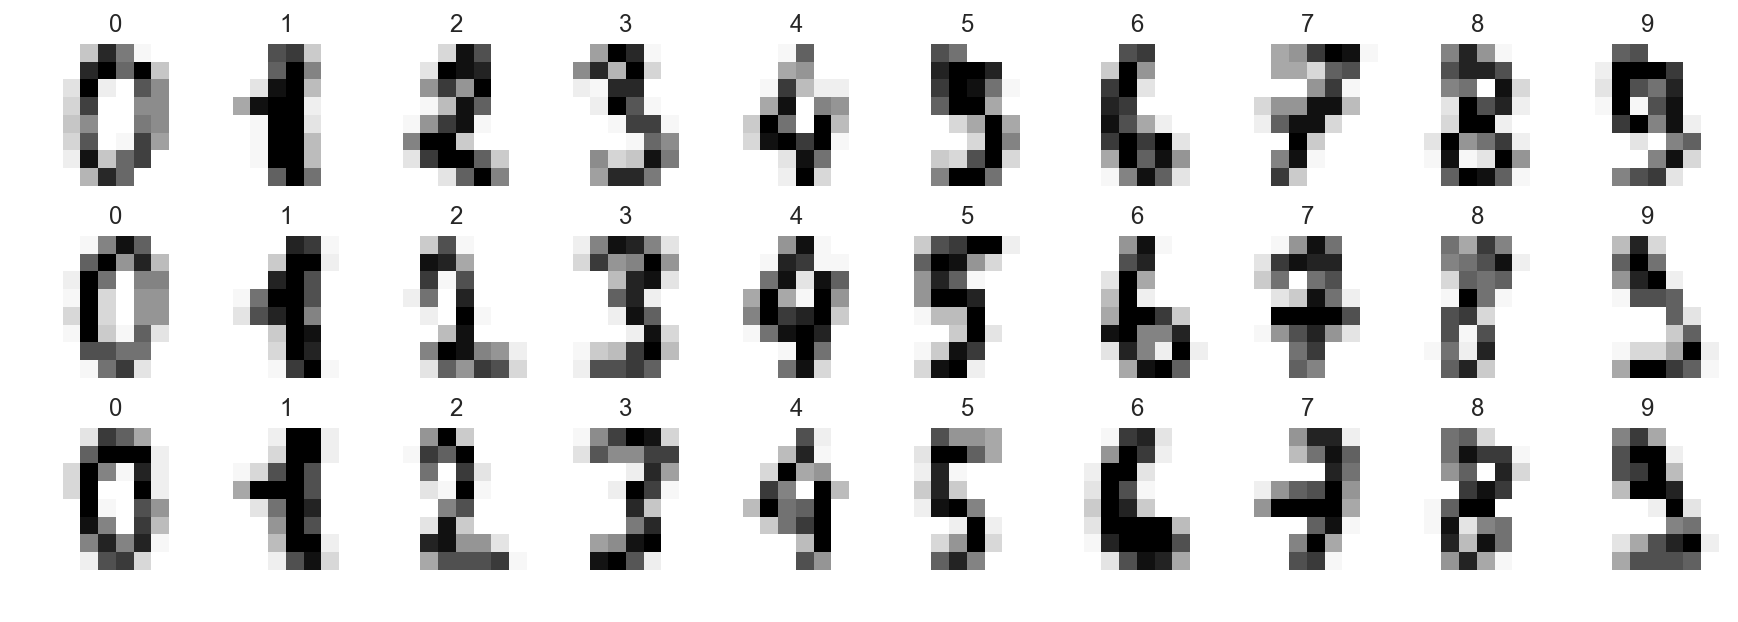

In [29]:
fig, axes = plt.subplots(ncols=10, nrows=3, figsize=(15, 5))

for ii, (ax, im, y_) in enumerate(zip(axes.flatten(), X, y)):
    ax.imshow(im.reshape((8, 8)), cmap="Greys")
    ax.set_title(y_)
    ax.axis("off")

We can use non-negative matrix factorization for unsupervised extraction of consistent patterns in the data.

In [30]:
from sklearn.decomposition import PCA, NMF

nmf = NMF(n_components=10)
X2 = nmf.fit(x_scaled).transform(x_scaled)
X2 = nmf.inverse_transform(X2)

In [31]:
nmf.components_.shape

(10, 64)

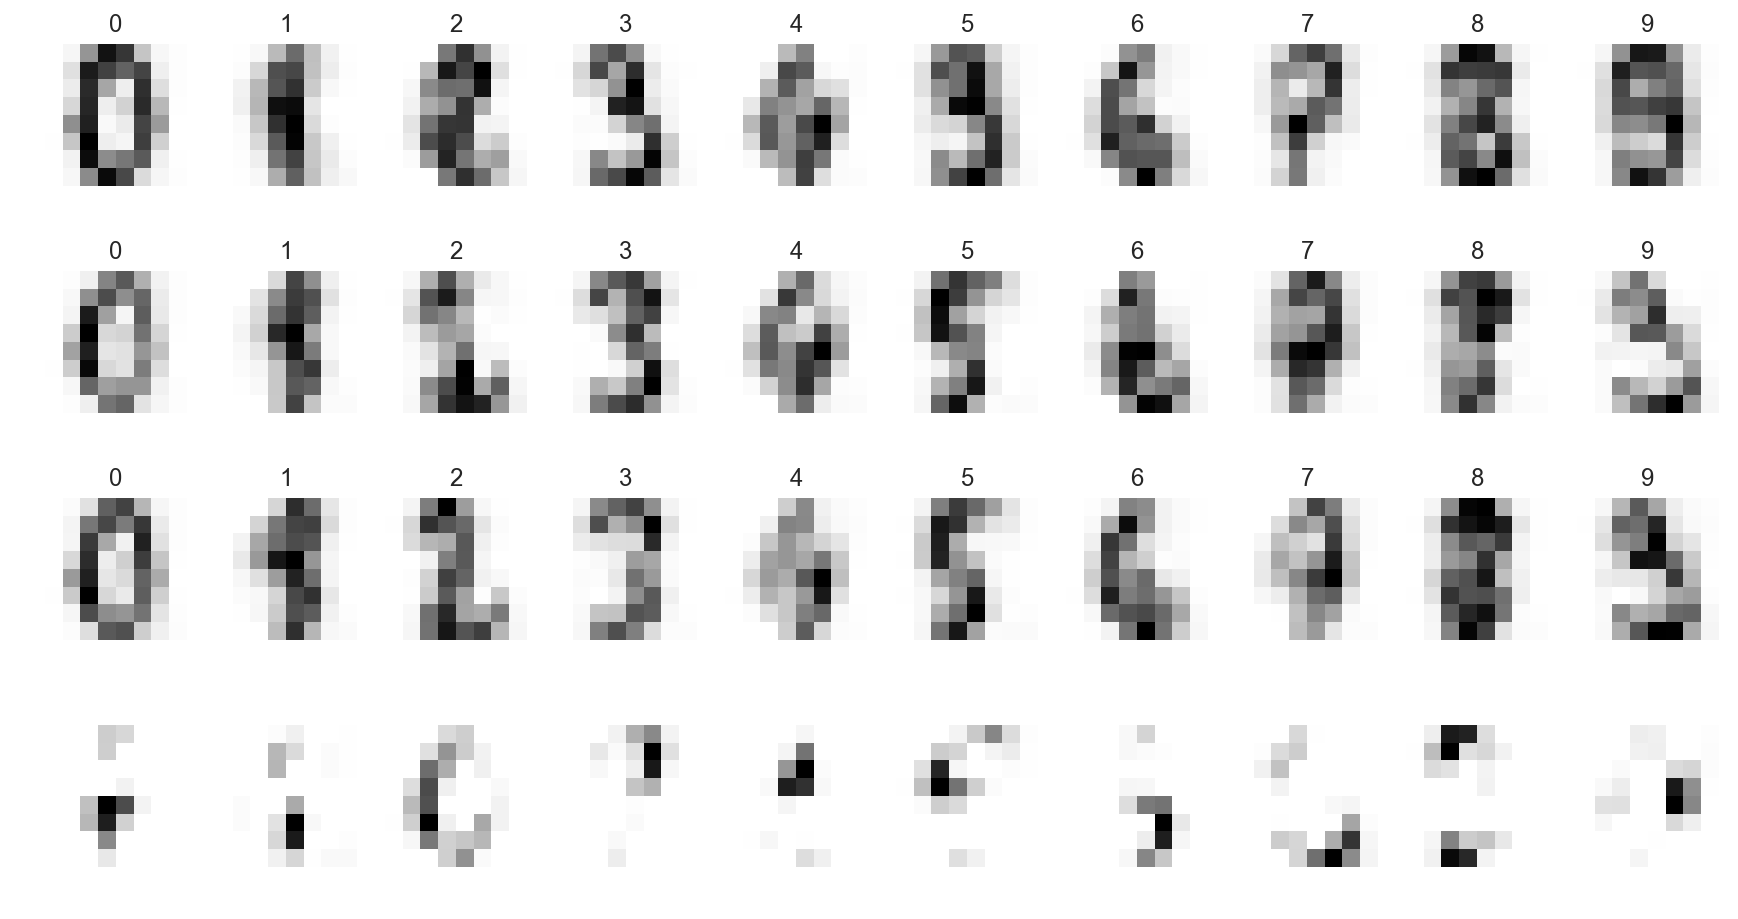

In [32]:
fig, axes = plt.subplots(ncols=10, nrows=4, figsize=(15, 8))

for ii, (ax, im, y_) in enumerate(zip(axes.flatten()[:30], X2, y)):
    ax.imshow(im.reshape((8, 8)), cmap="Greys")
    ax.set_title(y_)
    ax.axis("off")

for jj, comp in enumerate(nmf.components_):
    ax = axes.flatten()[ii + jj + 1]
    ax.imshow(comp.reshape((8, 8)), cmap="Greys")
    ax.axis("off")

And we can chain preprocessing stages and various classifiers ...

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

est_pipeline = make_pipeline(MinMaxScaler((0, 1)), NMF(n_components=35), LinearSVC())

In [34]:
cross_val_score(est_pipeline, X, y)

array([0.92358804, 0.90651085, 0.89932886])

... and with the same API, you could do Machine Learning on any kind of data!